<a href="https://colab.research.google.com/github/tjdux/deep-learning-study/blob/main/02_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- ⭐⭐**신경망: 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습**

## 01 퍼셉트론에서 신경망으로

### 01.01 신경망의 예
![img](https://compmath.korea.ac.kr/deeplearning/_images/nn_example.png)
- 가장 왼쪽 줄을 **입력층** (0층), 맨 오른 쪽 줄을 **출력층**(2층), 중간 줄을 **은닉층**(1층)
- 은닉층: 입력층, 출력층과 달리 사람 눈에는 보이지 않음

### 01.02 퍼셉트론 복습
$$f(\mathbf{x}) =
\begin{cases}
0 & (b + x_1 w_1 + x_2 w_2 \le 0) \\
1 & (b + x_1 w_1 + x_2 w_2 > 0)
\end{cases}
$$
- $b$: **편향**, 뉴런이 얼마나 쉽게 활성화되는냐를 제어
- $w_1, w_2$: **가중치**, 각 신호의 영향력을 제어

![img](https://mblogthumb-phinf.pstatic.net/MjAxNzA3MjVfMTIy/MDAxNTAwOTQ2MDkzNDQy.bC26V7_DDijjseFjR5VQRm4IZFs47xQAMRT5dQ_o3jog.ixRyhVassnd7SMgwVMXTMz5FCh4noygfD8A95e4PxQMg.PNG.cjswo9207/fig_3-3.png?type=w420)

$$y=h(b + x_1 w_1 + x_2 w_2)$$
$$h(\mathbf{x}) =
\begin{cases}
0 & (x\le 0) \\
1 & (x > 0)
\end{cases}
$$


### 01.03 활성화 함수의 등장
- **활성화 함수**(activation function): 입력 신호의 총합을 출력 신호로 변환하는 함수 ($h(x)$)
$$a = b + w_1x_1 + w_2x_2$$
$$y = h(a)$$
![img](https://blog.kakaocdn.net/dna/cVeBxI/btrZ6I7oxE7/AAAAAAAAAAAAAAAAAAAAAIBb9O_KB58X7RTbpUGyIjfAn8CpT7GtJPNaCBuK28Pk/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1769871599&allow_ip=&allow_referer=&signature=y%2B7SXGiokjwL2v0ycabmdkHKJ4Q%3D)

## 02 활성화 함수
- **계단 함수**(step function): 임계값을 경계로 출력이 바뀜
- 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 채용
- **신경망에서는 매끄럽게 변화하는 시그모이드 함수나 ReLU함수를, 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용**

### 02.01 시그모이드 함수
$$h(x) = \frac {1}{1 + exp(-x)}$$
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달
- 퍼셉트론과 신경망의 주된차이는 활성화 함수 뿐

### 02.02 계단 함수 구현하기

In [1]:
# 실수만 받아들이는 함수
def step_function(x):
  return 1 if x > 0 else 0

In [2]:
# 배열까지 받아들이는 함수
def step_function(x):
  y = x > 0
  return y.astype(int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(f"x: {x}")

y = x > 0
print(f"y: {y}")

y = y.astype(int) # astype: 배열의 자료형 변환
print(f"y: {y}")

x: [-1.  1.  2.]
y: [False  True  True]
y: [0 1 1]


### 02.03 계단 함수의 그래프

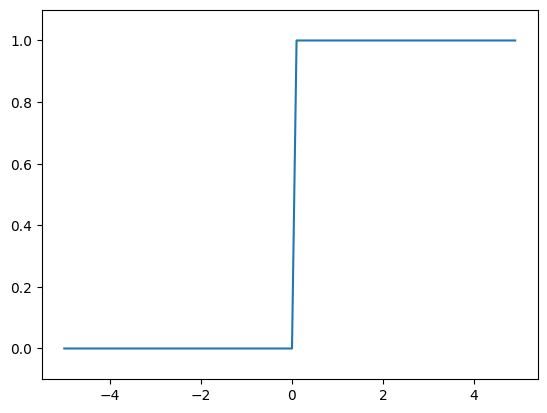

In [4]:
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 02.04 시그모이드 함수 구현하기

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [6]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

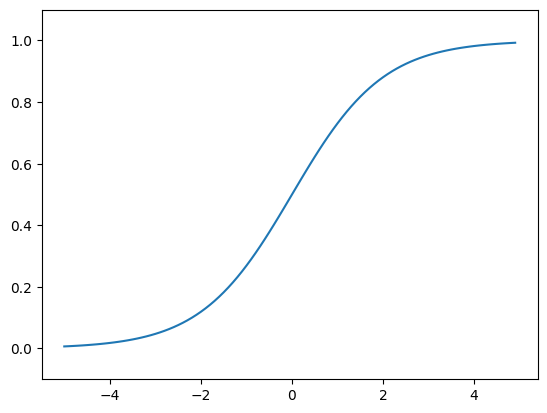

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 02.05 시그모이드 함수와 계단 함수 비교
- 시그모이드와 계단 함수의 차이: 매끄러움 👉 시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할
- 계단 함수는 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려줌 👉 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐름
- 공통점: 같은 모양 👉 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력
- 입력이 아무리 작거나 커도 출력은 0에서 1 사이

### 02.06 비선형 함수
- 계단 함수와 시그모이드 함수의 공통점: **비선형 함수**
- 선형 함수과 비선형 함수
  - 선형 함수
    - 출력이 입력의 상수배만큼 변하는 함수
    - f(x) = ax + b
    - 곧은 1개의 직선
  - 비선형 함수: 선형이 아닌 함수
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 함 👉 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어짐



### 02.07 ReLU 함수
- 시그모이드 함수는 오래전부터 이용해왔으나, 최근에는 **ReLU**(렐루) 함수를 주로 사용
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력
$$h(\mathbf{x}) =
\begin{cases}
0 & (x\le 0) \\
x & (x > 0)
\end{cases}
$$

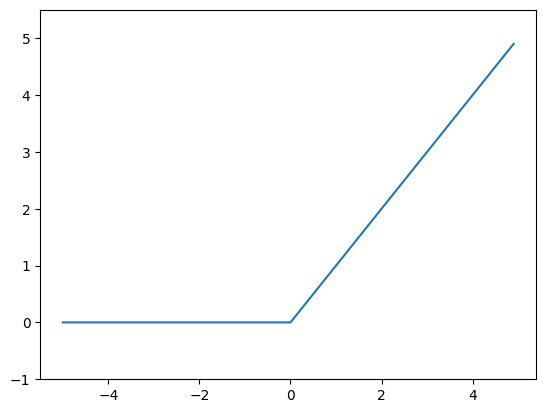

In [8]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5.5)
plt.show()

## 03 다차원 배열의 계산

### 03.01 다차원 배열


In [9]:
# 1차원 배열
A = np.array([1, 2, 3, 4])
print(np.ndim(A)) # 차원 수
print(A.shape) # 배열의 형상
print(A.shape[0])

1
(4,)
4


In [10]:
# 2차원 배열: 행렬 (matrix)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(np.ndim(B))
print(B.shape)

2
(3, 2)


### 03.02 행렬의 곱
- 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값을 더해서 계산
- A의 1행과 A의 1열의 결과는 1행 1번째 원소, A의 2행과 A의 1열의 결과는 2행 1번째 원소

In [11]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B) # ⚠️ np.dot(A, B)와 np.dot(B, A)의 결과는 다를 수 있음

array([[19, 22],
       [43, 50]])

In [12]:
A = np.array([[1, 2, 3], [4, 5, 6]]) # 2 * 3
B = np.array([[1, 2], [3, 4], [5, 6]]) # 3 * 2
np.dot(A, B)

array([[22, 28],
       [49, 64]])

- 행렬의 형상 (shape)에 주의!: 행렬 A의 1번째 차원의 원소 수 (열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야 함

In [13]:
C = np.array([[1, 2], [3, 4]]) # 2 * 2
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

- ⭐**다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 함**
- ⭐**계산 결과인 행렬 C의 형상은 행렬 A의 행 수와 행렬 B의 열 수가 됨**

![img](https://velog.velcdn.com/images%2Fhj3526%2Fpost%2Fa73b9076-5d03-4724-9153-6db38ea4a69f%2Fimage.png)

![img](https://mblogthumb-phinf.pstatic.net/MjAxOTEyMzBfMjAx/MDAxNTc3Njg2MzQwMDQz.GLwARi3XIw_3xIwdNVU7O0q9BzTXA50_7wpTnM4eyaog.P5dNk1HnuqiAOCDXiaIBozioCd49R1qDBxRsf5ctXvUg.JPEG.cni1577/SE-1c5b7ece-ce66-477c-95ec-34d56f72cf2b.jpg?type=w800)

In [14]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])
np.dot(A, B)

array([23, 53, 83])

### 03.03 신경망에서의 행렬 곱
![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPl142UCeuV5nAxlg-W-nsVWn6Jw-5PyXg1Q&s)

In [15]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 04 3층 신경망 구현하기
![img](https://mblogthumb-phinf.pstatic.net/MjAxODA2MTBfMjQ3/MDAxNTI4NjEzNzA1OTEx.8LP6DXgs8QCQTeni1VRi9BueT5Uv_DHKpRYBPqi2tC4g.TQmRFx4Qp_1j5kqfyxxLFB1zBo7yIeMTskaQjwX73Pkg.PNG.ssdyka/fig_3-15.png?type=w2)

### 04.01 표기법 설명
$w_{1 2}^{(1)}$
- 다음 층의 1번째 뉴런, 앞 층의 2번재 뉴런 (다음 층 번호, 앞 층 번호)
- 1층의 가중치

### 04.02 각 층의 신호 전달 구현하기
![img](https://velog.velcdn.com/images/changh2_00/post/f71553ef-a0a2-4e13-9509-c654d527b178/image.png)
$$a_1^{(1)} = w_{1 1}^{(1)}x_1 + w_{1 2}^{(1)}x_2 + b_1^{(1)}$$

$$A^{(1)} = XW^{(1)} + B^{(1)}$$

$$A^{(1)} = ( a_1^{(1)} a_2^{(1)} a_3^{(1)})$$
$$X = ( x_1, x_2 )$$
$$B^{(1)} = (b_1^{(1)} b_2^{(1)} b_3^{(1)})$$
$$W^{(1)} = \begin{pmatrix}
w_{1 1}^{(1)} & w_{2 1}^{(1)} & w_{3 1}^{(1)} \\
w_{1 2}^{(1)} & w_{2 2}^{(1)} & w_{3 2}^{(1)}
\end{pmatrix}
$$

In [16]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


![img](https://velog.velcdn.com/images/changh2_00/post/701ff9bd-1fb7-44ae-a255-fe5de63c88d5/image.png)

In [17]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


![img](https://velog.velcdn.com/images/changh2_00/post/53ae3180-0c89-4f15-8f2e-eb33ebf06c39/image.png)

In [18]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


![img](https://velog.velcdn.com/images/changh2_00/post/0afa3e2f-8a38-4450-be73-ed101eec4bb0/image.png)

In [19]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

### 04.03 구현 정리

In [20]:
def init_network():
  network = {}
  network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network["b1"] = np.array([0.1, 0.2, 0.3])
  network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network["b2"] = np.array([0.1, 0.2])
  network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network["b3"] = np.array([0.1, 0.2])

  return network

# forward: 순전파
def forward(network, x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 05 출력층 설계하기
- 분류와 회귀 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라짐
- **출력층의 활성화 함수는 회귀에서는 항등 함수, 분류에는 소프트맥스 함수 사용**

### 05.01 항등 함수와 소프트맥스 함수 구현하기
- **항등 함수**(identity function)
  - 입력을 그대로 출력
  - 입력과 출력이 항상 동일
- **소프트맥스 함수**(softmax function)
  $$y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}$$
  - $n$: 출력층의 뉴런 수
  - $y_k$: 출력층의 뉴런 중 k번째 출력
  - $a_k$: 입력 신호
  - 출력은 모든 입력 신호로부터 화살표를 받음

In [22]:
# 소프트맥스 함수
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(f"exp_a: {exp_a}")

sum_exp_a = np.sum(exp_a)
print(f"sum_exp_a: {sum_exp_a}")

y = exp_a / sum_exp_a
print(f"y: {y}")

exp_a: [ 1.34985881 18.17414537 54.59815003]
sum_exp_a: 74.1221542101633
y: [0.01821127 0.24519181 0.73659691]


In [23]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 05.02 소프트맥스 함수 구현 시 주의점
- 앞의 식은 컴퓨터로 계산할 때는 오버플로 문제가 있음 (지수함수 때문에!)
$$ y_k = \frac{\exp(a_k + C')}{\sum_{i=1}^{n} \exp(a_i + C')}$$
- 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 결과는 바뀌지 않음
- $C'$에 어떤 값을 대입해도 상관없지만, 입력 신호 중 최댓값을 이용하는 것이 일반적

In [24]:
a = np.array([1010, 1000, 90])
np.exp(a) / np.sum(np.exp(a)) # overflow

/tmp/ipython-input-2518045283.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/tmp/ipython-input-2518045283.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan,  0.])

In [27]:
c = np.max(a)
print(f"a - c: {a-c}")

np.exp(a-c) / np.sum(np.exp(a-c))

a - c: [   0  -10 -920]


array([9.99954602e-01, 4.53978687e-05, 0.00000000e+00])

In [28]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(np.exp(a - c))
  y = exp_a / sum_exp_a

  return y

### 05.03 소프트맥스 함수의 특징

In [29]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(f"y: {y}")
print(f"sum of y: {np.sum(y)}")

y: [0.01821127 0.24519181 0.73659691]
sum of y: 1.0


- 소프트맥스 함수의 출력: 0에서 1.0 사이의 실수
- **출력의 총합은 1** 👉 소프트맥스 함수의 출력을 확률로 해석할 수 있음
- 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응 가능
- ⚠️ 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음: 지수 함수는 단조 증가 함수
- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식 &  소프트 맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않음 ➡️ 신경망으로 분류할 때 추론 단계에서는 출력층의 소프트맥스 함수를 생략해도 됨 (학습 단계에서는 사용해야 함!)

### 05.04 출력층의 뉴런 수 정하기
- 분류: 분류하고 싶은 클래스 수로 설정하는 것이 일반적

## 06 손글씨 숫자 인식
- **순전파**(forward propagation)

### 06.01 MNIST 데이터셋
- 0 - 9까지의 숫자 이미지로 구성
- 훈련 이미지 60000장, 시험 이미지 10000장  
- 각 이미지는 28x28크기, 각 픽셀은 0에서 255까지의 값

In [46]:
# 데이터 로드
import tensorflow as tf

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5
(784,)
(28, 28)


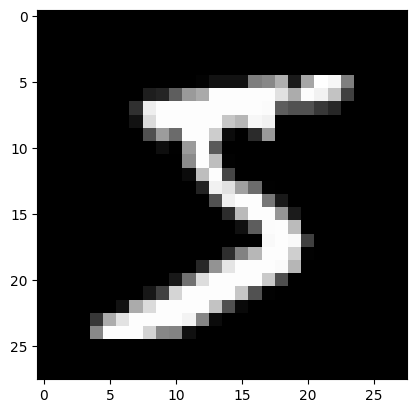

In [47]:
from PIL import Image

img = flattened_x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

plt.imshow(img, cmap='gray')

### 06.02 신경망의 추론 처리
- 입력층 뉴런 784개, 출력층 뉴런 10개
- 첫 번째 은닉층 뉴런 50개, 두 번째 은닉층 뉴런 100개

In [48]:
# 학습된 가중치 매개변수 로드
!wget https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/ch03/sample_weight.pkl
!ls -lh sample_weight.pkl

--2026-01-15 12:01:48--  https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/ch03/sample_weight.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181853 (178K) [application/octet-stream]
Saving to: ‘sample_weight.pkl.1’

sample_weight.pkl.1 100%[===================>] 177.59K  --.-KB/s    in 0.01s   

2026-01-15 12:01:48 (16.5 MB/s) - ‘sample_weight.pkl.1’ saved [181853/181853]

-rw-r--r-- 1 root root 178K Jan 15 11:52 sample_weight.pkl


In [49]:
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

  flattened_x_test = x_test.reshape(-1, 28 * 28)

  x_test = flattened_x_test / 255.0

  return x_test, t_test

def init_network():
  with open('sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [50]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스
  if p == t[i]:
    accuracy_cnt += 1

print(f"Accuracy: {float(accuracy_cnt) / len(x)}")

Accuracy: 0.9352


### 06.03 배치 처리


In [53]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

print(f"x.shape: {x.shape}")
print(f"x[0].shape: {x[0].shape}")
print(f"W1.shape: {W1.shape}")
print(f"W2.shape: {W2.shape}")
print(f"W3.shape: {W3.shape}")

x.shape: (10000, 784)
x[0].shape: (784,)
W1.shape: (784, 50)
W2.shape: (50, 100)
W3.shape: (100, 10)


![img](https://velog.velcdn.com/images/cksgh0984/post/95e9ebdf-416f-4d33-9247-a7eed917b456/image.png)

- **배치**(batch)
  - 하나로 묶은 입력 데이터
  - 1이미지 100개를 묶어 `predict()`에 전달
  
![img](https://velog.velcdn.com/images/cksgh0984/post/336f9a91-6ca3-4c17-ad2b-4a67f1ed6e24/image.png)

In [54]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f"Accuracy: {float(accuracy_cnt) / len(x)}")

Accuracy: 0.9352


In [55]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]
